In [1]:
%load_ext autoreload
%autoreload 2

import dotenv
dotenv.load_dotenv()


True

In [6]:
from PIL import Image
from vlms import llava

img = Image.open("sample_images/irl_capture.png").convert('RGB')

prompt = """
# Instructions

Pretend you are writing code to control a robot. Assume you have access to the following APIs.

## API Documentation: Robot

### `Object` class

This is a class used to represent objects in a scene.

Attributes:
 - point_cloud: N x 6 matrix of (x, y, z, r, g, b) points
 - centroid: (x, y, z) position (a 3-dimensional NumPy array)

Note: Positions are specified in meters.

### `Scene` class

Methods:

1. `scene.detect(img, object_description)`

Description:
Helps you locate objects in 3D space in an image.

Parameters:
 - img: an RGB image that may or may not contain the target object(s).
 - object_description: A text description of the object you would like to detect.
 
Returns:
 - objects: A list of Objects with an (x, y, z) position.

### `Robot` class

Methods:

1. `robot.move_to(x, y, z)`: Moves the robot arm's hand to a specified location.
Parameters:
 - x, y, z: The 3D position for the robot's gripper to move to.
 
2. `robot.move_by(dx, dy, dz)`: Moves the robot arm's hand by a specific relative amount (in meters).

3. `robot.grasp(object)`: Grasps an object.
Parameters: 
 - `object`, a variable of type `Object` (which is an item of the list returned by `scene.detect`)

4. `robot.release()`: Releases the grasped object.

## Task

Describe the image you see. Then, write a short plan for how to clean up the blocks in the scene.
Finally, write a code snippet that uses the provided APIs to control the robot to move to the desired location.
Your answer should include three sections:
- "Reasoning" with a brief consideration of the overall task goals,
- "Short Plan" with a brief natural language description of the plan,
- "Code Implementation", with a Python code block to control the robot in the desired way. Begin the code block with the string "```python"
and end the code block with the string "```".

Assume that `scene` and `robot` are local variables. Additionally, NumPy is available as `np`. However, do
not import or use any other libraries in your code.
"""

examples = """
# Examples

## Example 1

(Image placeholder)
Description of image: There are two green cups and a variety of other objects on the table.

Instructions: Stack the cups. It does not matter to me which cup is stacked on which other.

Reasoning:
It seems that the human wants to stack the cups. Because they did not indicate a preference
for the stacked cup, I will choose one arbitrarily. However, in other scenarios, I may want
to be more cautious. In order to stack two objects, I must move one of the objects on top of the other.
There are only two cups in the scene, and so this concludes my general analysis of the intent.

Short plan:
1. Locate the cups.
2. Choose a cup to stack onto the other cup.
3. Grasp the cup we wish to stack.
4. Move the robot's arm up, center it above the other cup, and place the cup we are holding

Code implementation:
```python
# Locate the cups.
cups = scene.detect('cup')

# Choose a cup to stack onto the other cup.
target_cup = cups[0]
stack_cup = cups[1]

# Grasp the cup we wish to stack.
robot.grasp(stack_cup)

# Move the robot's arm up,
robot.move_by(0, 0, 0.3)

# center it above the other cup, and
robot.move_to(base_cup.centroid[0], base_cup.centroid[1], base_cup.centroid[2] + 0.2)

# place the cup we are holding
robot.release()
```

"""


## Llava-1.5

In [ ]:
output = llava(img, "I want to clean up. Describe the objects in the scene that are most relevant to my query.\n\nAnswer:")

print(output)

## InternLM

In [ ]:
import torch
from transformers import AutoModel, AutoTokenizer

# init model and tokenizer
# https://huggingface.co/internlm/internlm-xcomposer2-4khd-7b
model = AutoModel.from_pretrained('internlm/internlm-xcomposer2-4khd-7b', trust_remote_code=True).cuda().eval()
tokenizer = AutoTokenizer.from_pretrained('internlm/internlm-xcomposer2-4khd-7b', trust_remote_code=True)


In [3]:
with torch.no_grad():
    query = "<ImageHere>What color are the blocks in the image?"
    image = './sample_images/irl_capture.png'
    with torch.cuda.amp.autocast():
      response, _ = model.chat(tokenizer, query=query, image=image, history=[], do_sample=False)
    print(response)


The blocks in the image are red and yellow.


**THIS IS A MARKDOWN-FORMATTED PROMPT FOR THE MODEL**

# Instructions

Pretend you are writing code to control a robot. Assume you have access to the following APIs.

## API Documentation: Robot

### `Object` class

This is a class used to represent objects in a scene.

Attributes:
 - point_cloud: N x 6 matrix of (x, y, z, r, g, b) points
 - centroid: (x, y, z) position

Note: Positions are specified in meters.

### `Scene` class

Methods:

1. `scene.detect(img, object_description)`

Description:
Helps you locate objects in 3D space in an image.

Parameters:
 - img: an RGB image that may or may not contain the target object(s).
 - object_description: A text description of the object you would like to detect.
 
Returns:
 - objects: A list of Objects with an (x, y, z) position.

### `Robot` class

Methods:

1. `robot.move_to(x, y, z)`: Moves the robot arm's hand to a specified location.
Parameters:
 - x, y, z: The 3D position for the robot's gripper to move to.
 
2. `robot.move_by(dx, dy, dz)`: Moves the robot arm's hand by a specific relative amount (in meters).

3. `robot.grasp(object)`: Grasps an object.
Parameters: 
 - `object`, a variable of type `Object` (which is an item of the list returned by `scene.detect`)

4. `robot.release()`: Releases the grasped object.

## Task

Describe the image you see. Then, write a short plan for how to clean up the blocks in the scene.
Finally, write a code snippet that uses the provided APIs to control the robot to move to the desired location.
Your answer should include three sections:
- "Reasoning" with a brief consideration of the overall task goals,
- "Short Plan" with a brief natural language description of the plan,
- "Code Implementation", with a Python code block to control the robot in the desired way.

Assume that `scene` and `robot` are local variables, and that you have access to the `numpy` library.

# Examples

## Example 1

(Image placeholder)
Description of image: There are two green cups and a variety of other objects on the table.

Instructions: Stack the cups. It does not matter to me which cup is stacked on which other.

Reasoning:
It seems that the human wants to stack the cups. Because they did not indicate a preference
for the stacked cup, I will choose one arbitrarily. However, in other scenarios, I may want
to be more cautious. In order to stack two objects, I must move one of the objects on top of the other.
There are only two cups in the scene, and so this concludes my general analysis of the intent.

Short plan:
1. Locate the cups.
2. Choose a cup to stack onto the other cup.
3. Grasp the cup we wish to stack.
4. Move the robot's arm up, center it above the other cup, and place the cup we are holding

Code implementation:
```python
# Locate the cups.
cups = scene.detect('cup')

# Choose a cup to stack onto the other cup.
target_cup = cups[0]
stack_cup = cups[1]

# Grasp the cup we wish to stack.
robot.grasp(stack_cup)

# Move the robot's arm up,
robot.move_by(0, 0, 0.3)

# center it above the other cup, and
robot.move_to(base_cup.centroid[0], base_cup.centroid[1], base_cup.centroid[2] + 0.2)

# place the cup we are holding
robot.release()
```

## Your Challenge

Task: Put the blocks into one of the cups.
Image description: There are two green cups, one blue cloth, and two blocks in the scene. A robot is positioned above the table.


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_id = "mistralai/Mixtral-8x7B-Instruct-v0.1"
mixtral_tokenizer = AutoTokenizer.from_pretrained(model_id)
mixtral_model = AutoModelForCausalLM.from_pretrained(model_id, device_map="auto", torch_dtype=torch.float16, use_flash_attention_2=True)


The model was loaded with use_flash_attention_2=True, which is deprecated and may be removed in a future release. Please use `attn_implementation="flash_attention_2"` instead.


Loading checkpoint shards:   0%|          | 0/19 [00:00<?, ?it/s]

In [7]:
inputs.shape

torch.Size([1, 1010])

Reasoning:
The task requires putting the blocks into one of the cups. First, I need to locate all the necessary objects, i.e., the cups and the blocks. Then, I should move the robot arm to pick up a block and place it in a cup. I will repeat this process for the second block as well.

Short Plan:
1. Locate the cups and the blocks.
2. Move the robot arm to pick up a block.
3. Place the block into one of the cups.
4. Repeat steps 2-3 for the second block.

Code Implementation:

```python
import numpy


In [7]:
messages = [
    {"role": "user", "content": prompt + examples + """
## Your Challenge

Task: Put the blocks into one of the cups.
Image description: There are two green cups, one blue cloth, and two blocks in the scene. A robot is positioned above the table. 
"""},
]

inputs = mixtral_tokenizer.apply_chat_template(
    messages, return_tensors="pt"
).to("cuda")

import time
start_time = time.time()
outputs = mixtral_model.generate(inputs, max_new_tokens=512)
end_time = time.time()
# print(mixtral_tokenizer.decode(outputs[0, len(inputs[0]):]))
output_without_input = outputs[0, len(inputs[0]):]
elapsed = end_time - start_time

print(f"Generation time: {elapsed:.3f}s")
print(f"Number of generated tokens: {len(output_without_input)}")

print(mixtral_tokenizer.decode(output_without_input, skip_special_tokens=True))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Generation time: 266.957s
Number of generated tokens: 418
Reasoning:
The task requires putting the blocks into one of the cups. First, I need to locate all the necessary objects, i.e., the cups and the blocks. Then, I should move the robot arm to grasp a block and place it into a cup. I will repeat this process until all blocks are in the cup.

Short Plan:
1. Locate the cups and blocks in the scene.
2. Grasp one block.
3. Move the robot arm to place the block into a cup.
4. Release the block.
5. Repeat steps 2-4 for the second block.

Code Implementation:

```python
import numpy as np

# Locate the cups and blocks in the scene
cups = scene.detect('cup')
blocks = scene.detect('block')

# Grasp one block
robot.grasp(blocks[0])

# Move the robot arm to place the block into a cup
# Calculate the average centroid of the cups to move the robot arm above the cups
cup_centroids = np.array([cup.centroid for cup in cups])
average_cup_centroid = np.mean(cup_centroids, axis=0)

# Move the robot ar

In [22]:
with torch.no_grad():
    query = "<ImageHere>" + prompt + examples
    image = './sample_images/irl_capture.png'
    with torch.cuda.amp.autocast():
      response, _ = model.chat(tokenizer, query=query, image=image, history=[], do_sample=False)
    print(response)


The image shows a white robot arm with six degrees of freedom mounted on a black table. There are two green cups, one blue cloth, and three blocks in the scene. The robot is positioned above the table.

To clean up the blocks, we can follow these steps:
1. Locate the blocks using the `scene.detect` function.
2. Choose a block to pick up.
3. Grasp the chosen block using the `robot.grasp` function.
4. Move the robot's arm to a safe location where the block won't fall.
5. Release the block using the `robot.release` function.

Here's an example code snippet that demonstrates this process:

```python
# Locate the blocks.
blocks = scene.detect('block', 'cuboid','red color','small size', 'on tabletop', 'not transparent', 'not glass', 'not metal', 'not plastic', 'not wood', 'not ceramic', 'not paper', 'not fabric', 'not rubber', 'not leather', 'not stone', 'not foam', 'not felt', 'not foam', 'not felt', 'not leather', 'not stone', 'not foam', 'not felt', 'not leather', 'not stone', 'not foam',

In [7]:
with open("sample_images/irl_capture.png", "rb") as f:
    img_str = f.read()

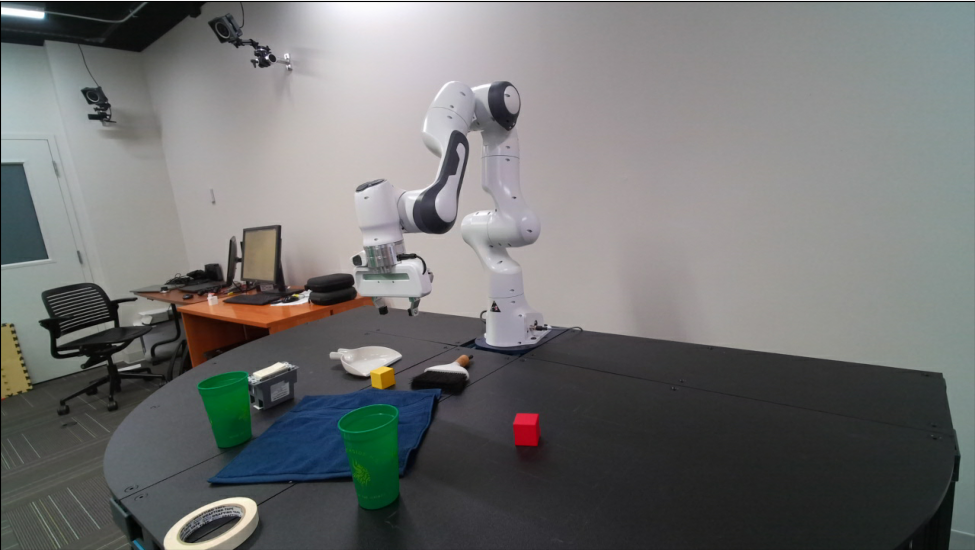

In [3]:
img

Detection duration: 0.75


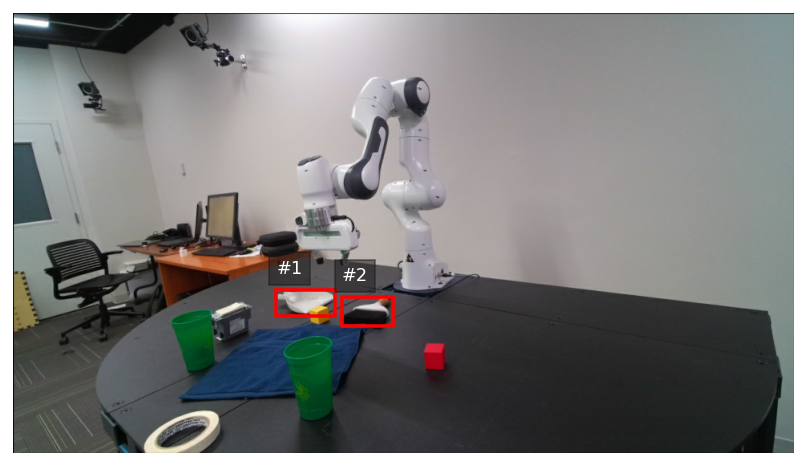

In [11]:
import matplotlib.pyplot as plt
from detect_objects import detect, draw_set_of_marks

preds = detect(img, "dustpan")
draw_set_of_marks(img, preds, live=True)
plt.show()


In [ ]:
# Try Llama 3!)
# NOTE: It seems like Llama 3 is unsupported by this version of Huggingface?
# Got to try it on Groq and its reasoning was not great though. I suppose in
# some sense there *are* capabilities that require depth.

'''
import transformers
import torch

model_id = "meta-llama/Meta-Llama-3-8B"

pipeline = transformers.pipeline(
    "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, device_map="auto"
)
pipeline("Hey how are you doing today?")
'''


In [ ]:
### Test Anthrophic.
### This model may be too expensive to run at inference time,
### and I should look into alternatives.

import anthropic
import base64

client = anthropic.Anthropic()

message = client.messages.create(
    model="claude-3-opus-20240229",
    max_tokens=1024,
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/png",
                        "data": base64.b64encode(img_str).decode('utf-8'),
                    },
                },
                {
                    "type": "text",
                    "text": prompt, # "Describe this image."
                }
            ],
        }
    ],
)

In [11]:
print(message.content[0].text)

Here is my analysis of the image and plan to clean up the blocks using the provided robot APIs:

Image Description:
The image shows a robotic arm mounted on a table or workbench. On the table surface are various colored blocks and cups scattered about. It looks like a robotics or computer vision research setup.

Short Plan:
1. Use scene.detect() to locate all the blocks in the image. 
2. For each detected block object, extract its (x, y, z) centroid position.
3. Command the robot to move_to() each block's position one by one.
4. Have the robot pick up each block and move it to a designated cleanup location, like a bin.
5. Repeat until all blocks have been put away, leaving the workspace clean.

Code Implementation:
```python
# Detect all blocks in the scene
objects = scene.detect(img, "toy blocks")

# Specify cleanup position 
cleanup_pos = [0.5, 0.5, 0.0]  # Example (x, y, z)

# Iterate through detected objects
for obj in objects:
    # Extract block position
    block_pos = obj.centr